In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [2]:
import ktrain
from ktrain import text

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder('data/aclImdb', 
                                                                       maxlen=500, 
                                                                       preprocess_mode='bert',
                                                                       train_test_names=['train', 
                                                                                         'test'],
                                                                       classes=['pos', 'neg'])

preprocessing train...


preprocessing test...


In [4]:
model = text.text_classifier('bert', (x_train, y_train))

Is Multi-Label? False
maxlen is 500
done.


In [5]:
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

In [6]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
 6492/25000 [======>.......................] - ETA: 19:19 - loss: 0.6908 - acc: 0.6155

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


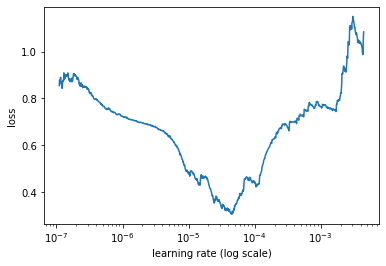

In [7]:
learner.lr_plot()

In [8]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 1966s 79ms/step - loss: 0.2575 - acc: 0.8886 - val_loss: 0.1649 - val_acc: 0.9384


### **93.84%** accuracy in a single epoch.

Let's make some predictions on new data.

In [9]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [10]:
data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
         'The film really sucked. I want my money back.',
        'The plot had too many holes.',
        'What a beautiful romantic comedy. 10/10 would see again!',
         ]

In [11]:
predictor.predict(data)

['neg', 'neg', 'neg', 'pos']